# Samurai by the numbers (lvl 1-49)
## by Tzuyu Chou (Cactuar)

## Update log
### 06/02/2017: Finished for now.
### 06/01/2017: Up to level 40 rotation.

In [117]:
from samurai import *
from plotting import *

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
from IPython.display import display
%matplotlib inline

## lvl 1-3 rotation

### Up to level 3, you only have one weaponskill... so use it.

In [118]:
sam = Samurai()

actions = [('Hakaze', sam.hakaze()),
           ('Hakaze', sam.hakaze()),
           ('Hakaze', sam.hakaze()),
           ('Hakaze', sam.hakaze()),
           ('Hakaze', sam.hakaze()),
           ('Hakaze', sam.hakaze()),
           ('Hakaze', sam.hakaze()),
           ('Hakaze', sam.hakaze()),
           ('Hakaze', sam.hakaze()),]

In [119]:
df0 = pd.DataFrame(actions, columns=['action', 'potency'])
df0['total potency'] = df0['potency'].cumsum(axis=0)
display(df0)

,action,potency,total potency
0,Hakaze,150.0,150.0
1,Hakaze,150.0,300.0
2,Hakaze,150.0,450.0
3,Hakaze,150.0,600.0
4,Hakaze,150.0,750.0
5,Hakaze,150.0,900.0
6,Hakaze,150.0,1050.0
7,Hakaze,150.0,1200.0
8,Hakaze,150.0,1350.0


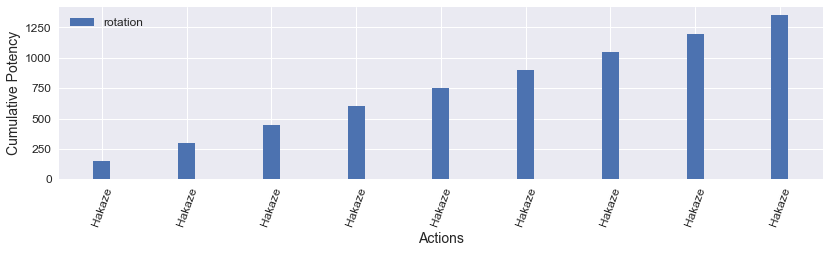

In [120]:
plot_potency(df0)

### Priority: Hakaze

## lvl 4-17 rotation

### At level 4, you gain the use of Jinpu, which combos from Hakaze and gives you your damage up buff. You'll definitely want to keep this buff up at all times and it should be simple enough with its 30s duration. The next weaponskill you obtain is Enbi, a ranged attack with a niche use. Level 6 grants you the defensive buff, Third Eye, and level 10 grants you the ability Ageha. Use Ageha on cooldown between weaponskills for additional damage.

In [121]:
sam = Samurai()

actions = [('Hakaze', sam.hakaze()),
           ('Jinpu', sam.jinpu()),
           ('Hakaze', sam.hakaze()),
           ('Jinpu', sam.jinpu()),
           ('Hakaze', sam.hakaze()),
           ('Jinpu', sam.jinpu()),
           ('Hakaze', sam.hakaze()),
           ('Jinpu', sam.jinpu()),
           ('Hakaze', sam.hakaze())]

In [122]:
df1 = pd.DataFrame(actions, columns=['action', 'potency'])
df1['total potency'] = df1['potency'].cumsum(axis=0)
display(df1)

,action,potency,total potency
0,Hakaze,150.0,150.0
1,Jinpu,280.0,430.0
2,Hakaze,172.5,602.5
3,Jinpu,322.0,924.5
4,Hakaze,172.5,1097.0
5,Jinpu,322.0,1419.0
6,Hakaze,172.5,1591.5
7,Jinpu,322.0,1913.5
8,Hakaze,172.5,2086.0


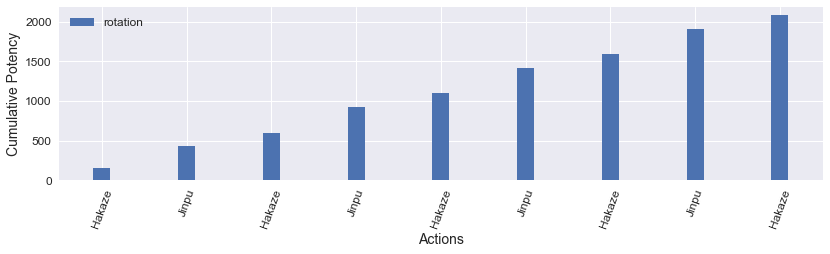

In [123]:
plot_potency(df1)

### How does this compare to the previous rotation?

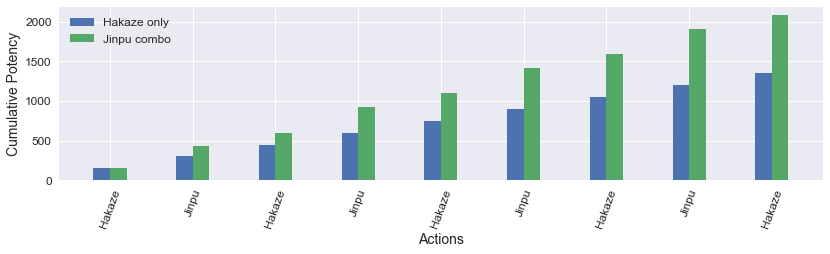

In [124]:
compare_potencies([df0, df1], ['Hakaze only', 'Jinpu combo'])

### You'll definitely want to use the Jinpu combo and keep the buff up.

### Priority: Jinpu 
### Filler: Jinpu combo

## lvl 18-29 rotation

### Level 18 sees the introduction of your haste buff, Shifu. When executed as a combo, Shifu grants you this buff for a duration of 30s in addition to the additional combo potency. At these levels, it's fairly close as to which buff takes priority, Shifu or Jinpu. However, with the introduction of Sen, you will definitely want to prioritize Shifu so that you may open your Sen more often to execute the powerful Iaijutsu more often.

** Note: the haste buff is modeled as a straight potency multiplier (11%) at this time since the discrete time model using timesteps of GCD does not account for the decreased GCD.

In [125]:
sam = Samurai()

actions = [('Hakaze', sam.hakaze()),
           ('Shifu', sam.shifu()),
           ('Hakaze', sam.hakaze()),
           ('Jinpu', sam.jinpu()),
           ('Hakaze', sam.hakaze()),
           ('Shifu', sam.shifu()),
           ('Hakaze', sam.hakaze()),
           ('Jinpu', sam.jinpu()),
           ('Hakaze', sam.hakaze())]

In [126]:
df2 = pd.DataFrame(actions, columns=['action', 'potency'])
df2['total potency'] = df2['potency'].cumsum(axis=0)
display(df2)

,action,potency,total potency
0,Hakaze,150.000,150.000
1,Shifu,280.000,430.000
2,Hakaze,166.500,596.500
3,Jinpu,310.800,907.300
4,Hakaze,191.475,1098.775
5,Shifu,357.420,1456.195
6,Hakaze,191.475,1647.670
7,Jinpu,357.420,2005.090
8,Hakaze,191.475,2196.565


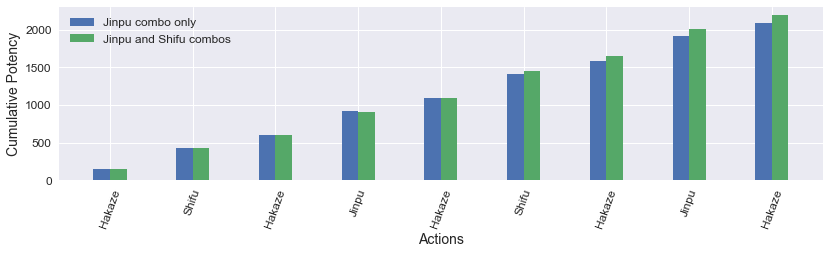

In [127]:
compare_potencies([df1, df2], ['Jinpu combo only', 'Jinpu and Shifu combos'])

#### Note: The Shifu buff is modeled as a 10% increase in potency per GCD, chosen arbitrarily. This explains the discrepancy for the first two GCDs. 

### Note that level 26 introduces your first AoE ability, Fuga. At this time, it does not combo to or from anything and deals 100 potency to all targets in a frontal cone. However, our Shifu/Jinpu combo rotation deals a hefty...

In [128]:
df2['total potency'][7] / 8

250.63624999999999

### average potency per GCD! Napkin math reveals that Fuga should do more potency per GCD for three or more targets. Should we put our Shifu and Jinpu buffs if they're not up before using Fuga? Depends on how long the encounter is.

In [129]:
dfs_buff = []
labels = []

for n_targets in range(3, 8):
    sam = Samurai()
    
    actions = [('Hakaze', sam.hakaze()),
               ('Shifu', sam.shifu()),
               ('Hakaze', sam.hakaze()),
               ('Jinpu', sam.jinpu()),
               ('Fuga', sam.fuga(n_targets)),
               ('Fuga', sam.fuga(n_targets)),
               ('Fuga', sam.fuga(n_targets)),
               ('Fuga', sam.fuga(n_targets)),
               ('Fuga', sam.fuga(n_targets))]
    
    df_temp = pd.DataFrame(actions, columns=['action', 'potency'])
    df_temp['total potency'] = df_temp['potency'].cumsum(axis=0)
    dfs_buff.append(df_temp)
    
    labels.append('%s targets' % n_targets)   

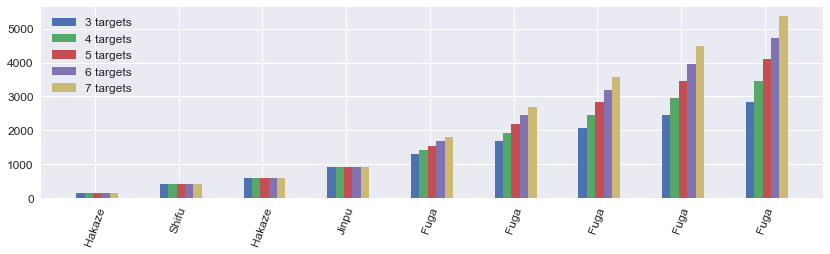

In [130]:
compare_n_potencies(dfs_buff, labels)

### For Fuga with no buffs:

In [131]:
dfs_no_buff = []
labels = []

for n_targets in range(3, 8):
    sam = Samurai()
    
    actions = [('Fuga', sam.fuga(n_targets)),
               ('Fuga', sam.fuga(n_targets)),
               ('Fuga', sam.fuga(n_targets)),
               ('Fuga', sam.fuga(n_targets)),
               ('Fuga', sam.fuga(n_targets)),
               ('Fuga', sam.fuga(n_targets)),
               ('Fuga', sam.fuga(n_targets)),
               ('Fuga', sam.fuga(n_targets)),
               ('Fuga', sam.fuga(n_targets))]
    
    df_temp = pd.DataFrame(actions, columns=['action', 'potency'])
    df_temp['total potency'] = df_temp['potency'].cumsum(axis=0)
    dfs_no_buff.append(df_temp)
    
    labels.append('%s targets' % n_targets)  

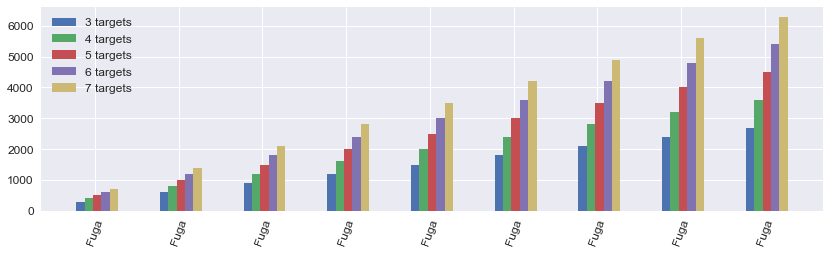

In [132]:
compare_n_potencies(dfs_no_buff, labels)

### The potency over four GCDs to put up Shifu and Jinpu is about 977. For $n$ targets, Fuga deals $4*n*100$ potency over that same time frame. The new potency per GCD with the buffs up is about $1.15*1.11*100=127.65$ potency times the number of targets.

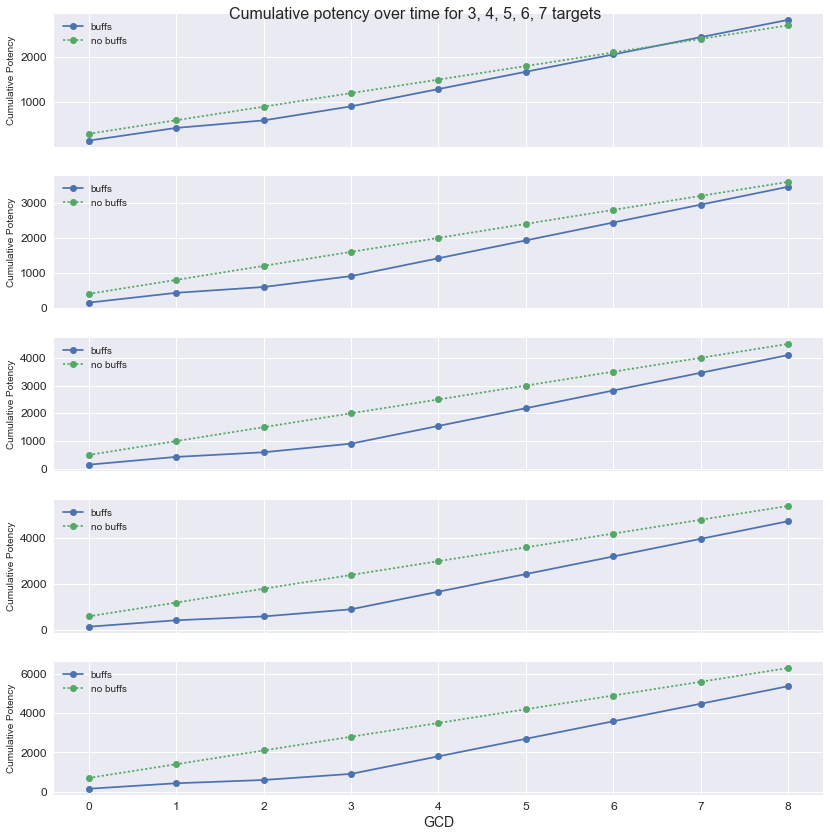

In [133]:
fig, axes = plt.subplots(nrows=len(dfs_buff), ncols=1, sharex=True, figsize=(12,12))
fig.tight_layout(pad=2)

for k, df in enumerate(dfs_buff): 
    ax = axes[k]
    
    ax.plot(df['total potency'], '-o', label='buffs')
    ax.plot(dfs_no_buff[k]['total potency'], ':o', label='no buffs')

    ax.set_ylabel('Cumulative Potency', fontsize=10)
    axes[-1].set_xlabel('GCD')
    ax.legend(loc='upper left', framealpha=0.5, prop={'size': 'small'})

fig.suptitle('Cumulative potency over time for 3, 4, 5, 6, 7 targets')
fig.tight_layout(pad=2)

### There are approximately ten GCDs after putting up your first buff, Shifu before you need to refresh it. For small mob counts, the crossover point where putting up buffs before using Fuga is more optimal occurs fairly early. However, as the number of targets increases, the upfront "cost" of putting the buffs up does not pay off. At these low levels, the pull sizes are likely to be small and depending on party composition, the AoE damage may not be high... so putting up buffs may win out (just watch out for the TP consumption!)

### Priority: Shifu > Jinpu. 
### Filler: Either combo to maintain the buffs.

### AoE: Shifu > Jinpu > Fuga for small groups. Fuga only for large groups (>6 or so)

## lvl 30-39 rotation

### Level 30 sees the introduction of your first Sen through the Gekko combo finisher (combo from Jinpu) and with it your first Iaijutsu, Higanbana. This powerful single-target weaponskill applies a 60s DoT in addition to initial damage for a total of 940 potency over its duration.

In [134]:
sam = Samurai()

actions = [('Hakaze', sam.hakaze()),
           ('Shifu', sam.shifu()),
           ('Hakaze', sam.hakaze()),
           ('Jinpu', sam.jinpu()),
           ('Gekko', sam.gekko()),
           ('Higanbana', sam.higanbana()),
           ('Hakaze', sam.hakaze()+sam.higanbana_dot()),
           ('Jinpu', sam.jinpu()+sam.higanbana_dot()),
           ('Gekko', sam.gekko()+sam.higanbana_dot())]

In [135]:
df3 = pd.DataFrame(actions, columns=['action', 'potency'])
df3['total potency'] = df3['potency'].cumsum(axis=0)
display(df3)

,action,potency,total potency
0,Hakaze,150.000000,150.000000
1,Shifu,280.000000,430.000000
2,Hakaze,166.500000,596.500000
3,Jinpu,310.800000,907.300000
4,Gekko,510.600000,1417.900000
5,Higanbana,306.360000,1724.260000
6,Hakaze,246.361364,1970.621364
7,Jinpu,412.306364,2382.927727
8,Gekko,565.486364,2948.414091


### Note: the potency of the DoT is prorated due to the GCD being shorter than the DoT tick period. So Higanbana's initial potency is applied on action and the DoT potency is added to subsequent GCDs. 

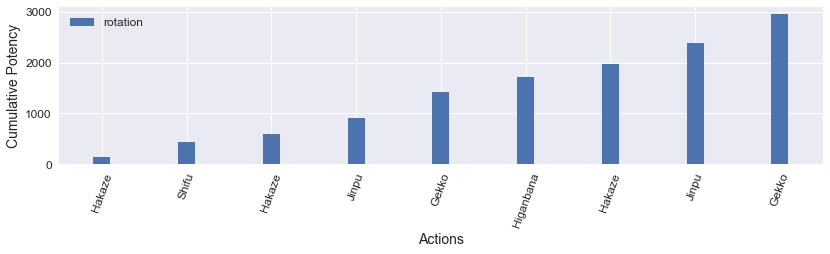

In [136]:
plot_potency(df3)

### At this point, the average potency of the Gekko combo is $400+280+150=830/3=~276.66$ before buffs. The average potency of the Shifu combo is $150+280=430/2=215$ before buffs. Therefore, Higanbana is more optimal than the Gekko combo after two DoT ticks. Since it takes approximately 3-4 GCDs to reapply Higanbana (Gekko combo plus cast time of Higanbana), Higanbana will always be optimal to clip in single target situations. In small mob groups, applying Higanbana to each target may also be optimal. (Need to do analysis.)

In [137]:
sam = Samurai()

actions = [('Hakaze', sam.hakaze()),
           ('Shifu', sam.shifu()),
           ('Hakaze', sam.hakaze()),
           ('Jinpu', sam.jinpu()),
           ('Gekko', sam.gekko()),
           ('Hakaze', sam.hakaze()),
           ('Jinpu', sam.jinpu()),
           ('Gekko', sam.gekko()),
           ('Hakaze', sam.hakaze()),
           ('Jinpu', sam.jinpu()),
           ('Gekko', sam.gekko()),
           ('Hakaze', sam.hakaze()),
           ('Shifu', sam.shifu()),
           ('Hakaze', sam.hakaze()),
           ('Jinpu', sam.jinpu()),
           ('Gekko', sam.gekko())]

In [138]:
df2_ext = pd.DataFrame(actions, columns=['action', 'potency'])
df2_ext['total potency'] = df2_ext['potency'].cumsum(axis=0)
display(df2_ext)

,action,potency,total potency
0,Hakaze,150.000,150.000
1,Shifu,280.000,430.000
2,Hakaze,166.500,596.500
3,Jinpu,310.800,907.300
4,Gekko,510.600,1417.900
5,Hakaze,191.475,1609.375
6,Jinpu,357.420,1966.795
7,Gekko,510.600,2477.395
8,Hakaze,191.475,2668.870
9,Jinpu,357.420,3026.290


In [139]:
sam = Samurai()

actions = [('Hakaze', sam.hakaze()),
           ('Shifu', sam.shifu()),
           ('Hakaze', sam.hakaze()),
           ('Jinpu', sam.jinpu()),
           ('Gekko', sam.gekko()),
           ('Higanbana', sam.higanbana()),
           ('Hakaze', sam.hakaze()+sam.higanbana_dot()),
           ('Jinpu', sam.jinpu()+sam.higanbana_dot()),
           ('Gekko', sam.gekko()+sam.higanbana_dot()),
           ('Higanbana', sam.higanbana()+sam.higanbana_dot()),
           ('Hakaze', sam.hakaze()+sam.higanbana_dot()),
           ('Shifu', sam.jinpu()+sam.higanbana_dot()),
           ('Hakaze', sam.hakaze()+sam.higanbana_dot()),
           ('Jinpu', sam.jinpu()+sam.higanbana_dot()),
           ('Gekko', sam.gekko()+sam.higanbana_dot()),
           ('Higanbana', sam.higanbana()+sam.higanbana_dot())]

In [140]:
df3_ext = pd.DataFrame(actions, columns=['action', 'potency'])
df3_ext['total potency'] = df3_ext['potency'].cumsum(axis=0)
display(df3_ext)

,action,potency,total potency
0,Hakaze,150.000000,150.000000
1,Shifu,280.000000,430.000000
2,Hakaze,166.500000,596.500000
3,Jinpu,310.800000,907.300000
4,Gekko,510.600000,1417.900000
5,Higanbana,306.360000,1724.260000
6,Hakaze,246.361364,1970.621364
7,Jinpu,412.306364,2382.927727
8,Gekko,565.486364,2948.414091
9,Higanbana,361.246364,3309.660455


### Here is an extended comparison of adding the Gekko finisher to the rotation but no Higanbana and the rotation with Higanbana (with DoT clipping) on a single target. In a multi-target situation, the DoT can be applied to different mobs to avoid clipping. This will increase the DoT potency accumulation following each Higanbana application, leading to a slight increase in net potency. Note the reapplication of Shifu to keep the buff up.

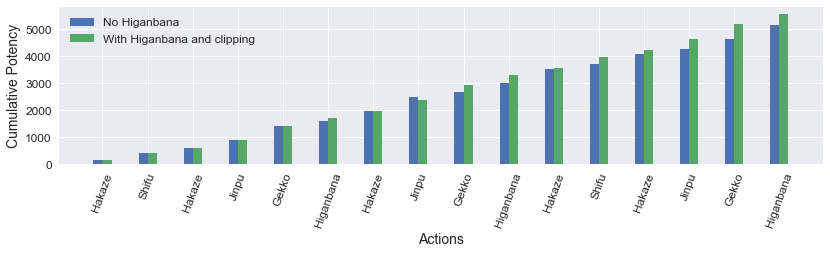

In [141]:
compare_potencies([df2_ext, df3_ext], ['No Higanbana', 'With Higanbana and clipping'])

### Now let's try applying Higanbana once and not clipping it:

In [142]:
sam = Samurai()

actions = [('Hakaze', sam.hakaze()),
           ('Shifu', sam.shifu()),
           ('Hakaze', sam.hakaze()),
           ('Jinpu', sam.jinpu()),
           ('Gekko', sam.gekko()),
           ('Higanbana', sam.higanbana()),
           ('Hakaze', sam.hakaze()+sam.higanbana_dot()),
           ('Jinpu', sam.jinpu()+sam.higanbana_dot()),
           ('Gekko', sam.gekko()+sam.higanbana_dot()),
           ('Hakaze', sam.hakaze()+sam.higanbana_dot()),
           ('Shifu', sam.jinpu()+sam.higanbana_dot()),
           ('Hakaze', sam.hakaze()+sam.higanbana_dot()),
           ('Jinpu', sam.jinpu()+sam.higanbana_dot()),
           ('Gekko', sam.gekko()+sam.higanbana_dot()),
           ('Hakaze', sam.hakaze()+sam.higanbana_dot()),
           ('Jinpu', sam.jinpu()+sam.higanbana_dot())]

In [143]:
df3_ext2 = pd.DataFrame(actions, columns=['action', 'potency'])
df3_ext2['total potency'] = df3_ext2['potency'].cumsum(axis=0)
display(df3_ext2)

,action,potency,total potency
0,Hakaze,150.000000,150.000000
1,Shifu,280.000000,430.000000
2,Hakaze,166.500000,596.500000
3,Jinpu,310.800000,907.300000
4,Gekko,510.600000,1417.900000
5,Higanbana,306.360000,1724.260000
6,Hakaze,246.361364,1970.621364
7,Jinpu,412.306364,2382.927727
8,Gekko,565.486364,2948.414091
9,Hakaze,246.361364,3194.775455


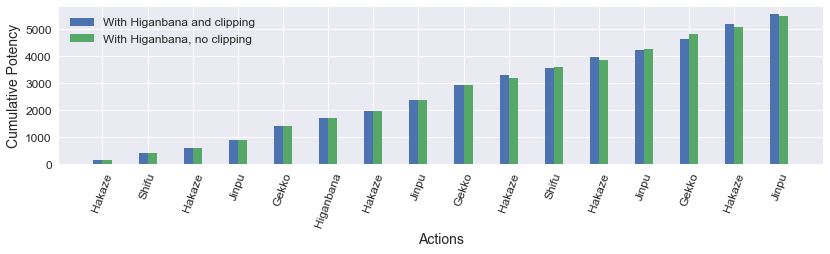

In [144]:
compare_potencies([df3_ext, df3_ext2], ['With Higanbana and clipping', 'With Higanbana, no clipping'])

### Note the label swapped for the case with clipping. It's fairly close over this time horizon. Regardless if you clip Higanbana or not, it is better than not using Higanbana at all, as shown by the previous graphic.

### Level 35 introduces an AoE combo with Mangetsu (combo from Fuga). This weaponskill also opens the Getsu Sen. Due to the diminishing AoE scaling, this combo is an average of no less than 100 potency per target over two GCDs. Because Mangetsu opens the Getsu Sen, this allows you to apply Higanbana to individual targets in the group. Depending on group size and encounter duration, this may be optimal. 

### Quick napkin math indicates that groups of 5 or larger may be the decision boundary. At five targets, the AoE combo averages $500+200*(1+0.9+0.8+0.7+0.6)=1300/2=650$ potency per GCD. This is equivalent to about 12-13 DoT ticks from Higanbana, or approximately 36-42 seconds after Higanbana application, depending on server ticks. That is typically longer than most pulls. Let's examine it.

In [145]:
sam = Samurai()

n_targets = 5

actions = [('Fuga', sam.fuga(n_targets)),
           ('Mangetsu', sam.mangetsu(n_targets)),
           ('Higanbana', sam.higanbana()),
           ('Fuga', sam.fuga(n_targets)+sam.higanbana_dot()),
           ('Mangetsu', sam.mangetsu(n_targets)+sam.higanbana_dot()),
           ('Higanbana', sam.higanbana()+sam.higanbana_dot()),
           ('Fuga', sam.fuga(n_targets)+2*sam.higanbana_dot()),
           ('Mangetsu', sam.mangetsu(n_targets)+2*sam.higanbana_dot()),
           ('Higanbana', sam.higanbana()+2*sam.higanbana_dot()),
           ('Fuga', sam.fuga(n_targets)+3*sam.higanbana_dot()),
           ('Mangetsu', sam.mangetsu(n_targets)+3*sam.higanbana_dot()),
           ('Higanbana', sam.higanbana()+3*sam.higanbana_dot()),
           ('Fuga', sam.fuga(n_targets)+4*sam.higanbana_dot()),
           ('Mangetsu', sam.mangetsu(n_targets)+4*sam.higanbana_dot())]

In [146]:
df4 = pd.DataFrame(actions, columns=['action', 'potency'])
df4['total potency'] = df4['potency'].cumsum(axis=0)
display(df4)

,action,potency,total potency
0,Fuga,500.000000,500.000000
1,Mangetsu,800.000000,1300.000000
2,Higanbana,240.000000,1540.000000
3,Fuga,547.727273,2087.727273
4,Mangetsu,847.727273,2935.454545
5,Higanbana,287.727273,3223.181818
6,Fuga,595.454545,3818.636364
7,Mangetsu,895.454545,4714.090909
8,Higanbana,335.454545,5049.545455
9,Fuga,643.181818,5692.727273


In [147]:
sam = Samurai()

n_targets = 5

actions = [('Fuga', sam.fuga(n_targets)),
           ('Mangetsu', sam.mangetsu(n_targets)),
           ('Fuga', sam.fuga(n_targets)),
           ('Mangetsu', sam.mangetsu(n_targets)),
           ('Fuga', sam.fuga(n_targets)),
           ('Mangetsu', sam.mangetsu(n_targets)),
           ('Fuga', sam.fuga(n_targets)),
           ('Mangetsu', sam.mangetsu(n_targets)),
           ('Fuga', sam.fuga(n_targets)),
           ('Mangetsu', sam.mangetsu(n_targets)),
           ('Fuga', sam.fuga(n_targets)),
           ('Mangetsu', sam.mangetsu(n_targets)),
           ('Fuga', sam.fuga(n_targets)),
           ('Mangetsu', sam.mangetsu(n_targets))]

In [148]:
df4_2 = pd.DataFrame(actions, columns=['action', 'potency'])
df4_2['total potency'] = df4_2['potency'].cumsum(axis=0)
display(df4_2)

,action,potency,total potency
0,Fuga,500.0,500.0
1,Mangetsu,800.0,1300.0
2,Fuga,500.0,1800.0
3,Mangetsu,800.0,2600.0
4,Fuga,500.0,3100.0
5,Mangetsu,800.0,3900.0
6,Fuga,500.0,4400.0
7,Mangetsu,800.0,5200.0
8,Fuga,500.0,5700.0
9,Mangetsu,800.0,6500.0


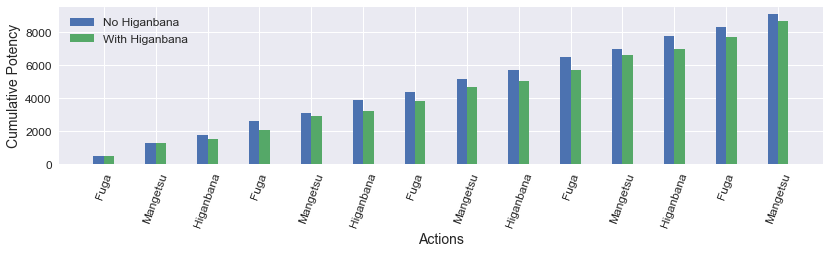

In [149]:
compare_potencies([df4_2, df4], ['No Higanbana', 'With Higanbana'])

### Given a long enough encounter, the gap may close. This gap will further increase for larger packs. How do smaller packs fare?

In [150]:
sam = Samurai()

n_targets = 4

actions = [('Fuga', sam.fuga(n_targets)),
           ('Mangetsu', sam.mangetsu(n_targets)),
           ('Higanbana', sam.higanbana()),
           ('Fuga', sam.fuga(n_targets)+sam.higanbana_dot()),
           ('Mangetsu', sam.mangetsu(n_targets)+sam.higanbana_dot()),
           ('Higanbana', sam.higanbana()+sam.higanbana_dot()),
           ('Fuga', sam.fuga(n_targets)+2*sam.higanbana_dot()),
           ('Mangetsu', sam.mangetsu(n_targets)+2*sam.higanbana_dot()),
           ('Higanbana', sam.higanbana()+2*sam.higanbana_dot()),
           ('Fuga', sam.fuga(n_targets)+3*sam.higanbana_dot()),
           ('Mangetsu', sam.mangetsu(n_targets)+3*sam.higanbana_dot()),
           ('Higanbana', sam.higanbana()+3*sam.higanbana_dot()),
           ('Fuga', sam.fuga(n_targets)+4*sam.higanbana_dot()),
           ('Mangetsu', sam.mangetsu(n_targets)+4*sam.higanbana_dot())]

df4_4 = pd.DataFrame(actions, columns=['action', 'potency'])
df4_4['total potency'] = df4_4['potency'].cumsum(axis=0)

In [151]:
sam = Samurai()

n_targets = 4

actions = [('Fuga', sam.fuga(n_targets)),
           ('Mangetsu', sam.mangetsu(n_targets)),
           ('Fuga', sam.fuga(n_targets)),
           ('Mangetsu', sam.mangetsu(n_targets)),
           ('Fuga', sam.fuga(n_targets)),
           ('Mangetsu', sam.mangetsu(n_targets)),
           ('Fuga', sam.fuga(n_targets)),
           ('Mangetsu', sam.mangetsu(n_targets)),
           ('Fuga', sam.fuga(n_targets)),
           ('Mangetsu', sam.mangetsu(n_targets)),
           ('Fuga', sam.fuga(n_targets)),
           ('Mangetsu', sam.mangetsu(n_targets)),
           ('Fuga', sam.fuga(n_targets)),
           ('Mangetsu', sam.mangetsu(n_targets))]

df4_4_no_sen = pd.DataFrame(actions, columns=['action', 'potency'])
df4_4_no_sen['total potency'] = df4_4_no_sen['potency'].cumsum(axis=0)

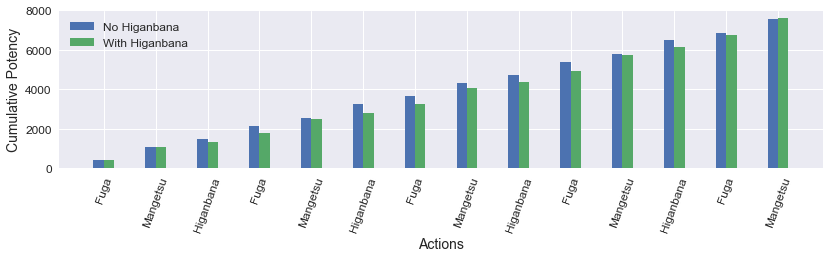

In [152]:
compare_potencies([df4_4_no_sen, df4_4], ['No Higanbana', 'With Higanbana'])

### With four targets, the gap closed as we applied Higanbana to all targets. We can continue with the Mangetsu combo only after that while reaping the four DoTs. Now with three targets?

In [153]:
sam = Samurai()

n_targets = 3

actions = [('Fuga', sam.fuga(n_targets)),
           ('Mangetsu', sam.mangetsu(n_targets)),
           ('Higanbana', sam.higanbana()),
           ('Fuga', sam.fuga(n_targets)+sam.higanbana_dot()),
           ('Mangetsu', sam.mangetsu(n_targets)+sam.higanbana_dot()),
           ('Higanbana', sam.higanbana()+sam.higanbana_dot()),
           ('Fuga', sam.fuga(n_targets)+2*sam.higanbana_dot()),
           ('Mangetsu', sam.mangetsu(n_targets)+2*sam.higanbana_dot()),
           ('Higanbana', sam.higanbana()+2*sam.higanbana_dot()),
           ('Fuga', sam.fuga(n_targets)+3*sam.higanbana_dot()),
           ('Mangetsu', sam.mangetsu(n_targets)+3*sam.higanbana_dot()),
           ('Fuga', sam.fuga(n_targets)+3*sam.higanbana_dot()),
           ('Mangetsu', sam.mangetsu(n_targets)+3*sam.higanbana_dot()),
           ('Fuga', sam.fuga(n_targets)+3*sam.higanbana_dot())]

df4_3 = pd.DataFrame(actions, columns=['action', 'potency'])
df4_3['total potency'] = df4_3['potency'].cumsum(axis=0)

In [154]:
sam = Samurai()

n_targets = 3

actions = [('Fuga', sam.fuga(n_targets)),
           ('Mangetsu', sam.mangetsu(n_targets)),
           ('Fuga', sam.fuga(n_targets)),
           ('Mangetsu', sam.mangetsu(n_targets)),
           ('Fuga', sam.fuga(n_targets)),
           ('Mangetsu', sam.mangetsu(n_targets)),
           ('Fuga', sam.fuga(n_targets)),
           ('Mangetsu', sam.mangetsu(n_targets)),
           ('Fuga', sam.fuga(n_targets)),
           ('Mangetsu', sam.mangetsu(n_targets)),
           ('Fuga', sam.fuga(n_targets)),
           ('Mangetsu', sam.mangetsu(n_targets)),
           ('Fuga', sam.fuga(n_targets)),
           ('Mangetsu', sam.mangetsu(n_targets))]

df4_3_no_sen = pd.DataFrame(actions, columns=['action', 'potency'])
df4_3_no_sen['total potency'] = df4_3_no_sen['potency'].cumsum(axis=0)

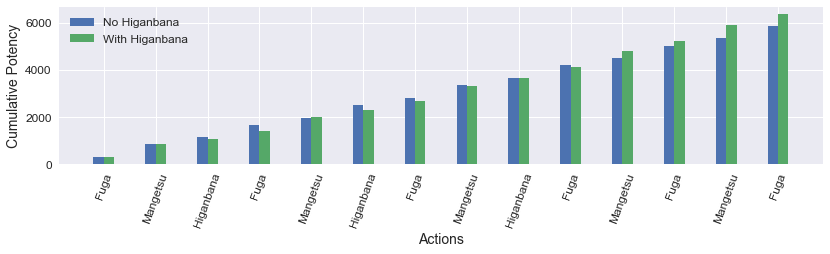

In [155]:
compare_potencies([df4_3_no_sen, df4_3], ['No Higanbana', 'With Higanbana'])

### Here we see using Higanbana pull ahead. Since this is the typical pull size for leveling dungeons, this is likely optimal at this level range. Should we buff with Jinpu and Shifu before executing this rotation?

In [156]:
sam = Samurai()

n_targets = 3

actions = [('Hakaze', sam.hakaze()),
           ('Shifu', sam.shifu()),
           ('Hakaze', sam.hakaze()),
           ('Jinpu', sam.jinpu()),
           ('Fuga', sam.fuga(n_targets)),
           ('Mangetsu', sam.mangetsu(n_targets)),
           ('Higanbana', sam.higanbana()),
           ('Fuga', sam.fuga(n_targets)+sam.higanbana_dot()),
           ('Mangetsu', sam.mangetsu(n_targets)+sam.higanbana_dot()),
           ('Higanbana', sam.higanbana()+sam.higanbana_dot()),
           ('Fuga', sam.fuga(n_targets)+2*sam.higanbana_dot()),
           ('Mangetsu', sam.mangetsu(n_targets)+2*sam.higanbana_dot()),
           ('Higanbana', sam.higanbana()+2*sam.higanbana_dot()),
           ('Fuga', sam.fuga(n_targets)+3*sam.higanbana_dot()),
           ('Mangetsu', sam.mangetsu(n_targets)+3*sam.higanbana_dot())]

df4_3_buff = pd.DataFrame(actions, columns=['action', 'potency'])
df4_3_buff['total potency'] = df4_3_buff['potency'].cumsum(axis=0)
display(df4_3_buff)

,action,potency,total potency
0,Hakaze,150.000000,150.000000
1,Shifu,280.000000,430.000000
2,Hakaze,166.500000,596.500000
3,Jinpu,310.800000,907.300000
4,Fuga,382.950000,1290.250000
5,Mangetsu,689.310000,1979.560000
6,Higanbana,306.360000,2285.920000
7,Fuga,437.836364,2723.756364
8,Mangetsu,744.196364,3467.952727
9,Higanbana,361.246364,3829.199091


In [157]:
sam = Samurai()

n_targets = 3

actions = [('Fuga', sam.fuga(n_targets)),
           ('Mangetsu', sam.mangetsu(n_targets)),
           ('Higanbana', sam.higanbana()),
           ('Fuga', sam.fuga(n_targets)+sam.higanbana_dot()),
           ('Mangetsu', sam.mangetsu(n_targets)+sam.higanbana_dot()),
           ('Higanbana', sam.higanbana()+sam.higanbana_dot()),
           ('Fuga', sam.fuga(n_targets)+2*sam.higanbana_dot()),
           ('Mangetsu', sam.mangetsu(n_targets)+2*sam.higanbana_dot()),
           ('Higanbana', sam.higanbana()+2*sam.higanbana_dot()),
           ('Fuga', sam.fuga(n_targets)+3*sam.higanbana_dot()),
           ('Mangetsu', sam.mangetsu(n_targets)+3*sam.higanbana_dot()),
           ('Fuga', sam.fuga(n_targets)+3*sam.higanbana_dot()),
           ('Mangetsu', sam.mangetsu(n_targets)+3*sam.higanbana_dot()),
           ('Fuga', sam.fuga(n_targets)+3*sam.higanbana_dot()),
           ('Mangetsu', sam.mangetsu(n_targets)+3*sam.higanbana_dot())]

df4_3_nobuff = pd.DataFrame(actions, columns=['action', 'potency'])
df4_3_nobuff['total potency'] = df4_3_nobuff['potency'].cumsum(axis=0)
display(df4_3_nobuff)

,action,potency,total potency
0,Fuga,300.000000,300.000000
1,Mangetsu,540.000000,840.000000
2,Higanbana,240.000000,1080.000000
3,Fuga,347.727273,1427.727273
4,Mangetsu,587.727273,2015.454545
5,Higanbana,287.727273,2303.181818
6,Fuga,395.454545,2698.636364
7,Mangetsu,635.454545,3334.090909
8,Higanbana,335.454545,3669.545455
9,Fuga,443.181818,4112.727273


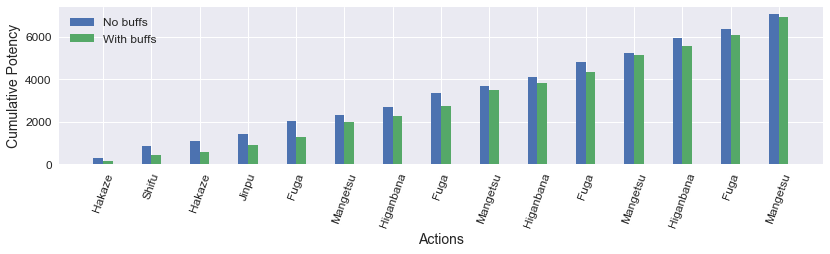

In [158]:
compare_potencies([df4_3_nobuff, df4_3_buff], ['No buffs', 'With buffs'])

### It's very close. Here we neglected to refresh Shifu which would further widen the gap in favor of no buffs. Ideally, you would shift to a single target rotation as mobs die, possibly letting you refresh buffs that carry over to the next pull. 

### Priority: Shifu > Jinpu
### Filler: Gekko combo > Higanbana
### AoE: Mangetsu combo + Higanbana, depending on group size and encounter duration

## lvl 40-49 rotation

### Level 40 introduces the Kasha combo finisher (combo from Shifu). Equal in potency to the Gekko finisher, this weaponskill when combod opens the Ka Sen. This leads to a maximum of two Sen open at any given time and also unlocks the use of the Iaijutsu, Tenka Goken. This powerful, point blank AoE weaponskill scales its potency depending on the number of targets up to a maximum of 360 potency for the first target hit. In AoE situations, this is likely Iaijutsu of choice due to its instantaneous damage but is, once again, subject to target count and encounter duration. Unfortunately, you do not get the AoE weaponskill to open Ka until level 45. But for single target, do we still want to try our shiny new Iaijutsu?

In [159]:
sam = Samurai()

n_targets = 1

actions = [('Hakaze', sam.hakaze()),
           ('Shifu', sam.shifu()),
           ('Kasha', sam.kasha()),
           ('Higanbana', sam.higanbana()),
           ('Hakaze', sam.hakaze()+sam.higanbana_dot()),
           ('Jinpu', sam.jinpu()+sam.higanbana_dot()),
           ('Gekko', sam.gekko()+sam.higanbana_dot()),
           ('Hakaze', sam.hakaze()+sam.higanbana_dot()),
           ('Shifu', sam.jinpu()+sam.higanbana_dot()),
           ('Kasha', sam.kasha()+sam.higanbana_dot()),
           ('Tenka Goken', sam.tenka_goken(n_targets)+sam.higanbana_dot()),
           ('Hakaze', sam.hakaze()+sam.higanbana_dot()),
           ('Jinpu', sam.jinpu()+sam.higanbana_dot()),
           ('Gekko', sam.gekko()+sam.higanbana_dot()),
           ('Hakaze', sam.hakaze()+sam.higanbana_dot()),
           ('Shifu', sam.jinpu()+sam.higanbana_dot()),
           ('Kasha', sam.kasha()+sam.higanbana_dot()),
           ('Tenka Goken', sam.tenka_goken(n_targets)+sam.higanbana_dot())]

In [160]:
df5_tenka = pd.DataFrame(actions, columns=['action', 'potency'])
df5_tenka['total potency'] = df5_tenka['potency'].cumsum(axis=0)
display(df5_tenka)

,action,potency,total potency
0,Hakaze,150.000000,150.000000
1,Shifu,280.000000,430.000000
2,Kasha,444.000000,874.000000
3,Higanbana,266.400000,1140.400000
4,Hakaze,214.227273,1354.627273
5,Jinpu,365.686364,1720.313636
6,Gekko,565.486364,2285.800000
7,Hakaze,246.361364,2532.161364
8,Shifu,412.306364,2944.467727
9,Kasha,182.536364,3127.004091


In [161]:
sam = Samurai()

n_targets = 1

actions = [('Hakaze', sam.hakaze()),
           ('Shifu', sam.shifu()),
           ('Kasha', sam.kasha()),
           ('Higanbana', sam.higanbana()),
           ('Hakaze', sam.hakaze()+sam.higanbana_dot()),
           ('Jinpu', sam.jinpu()+sam.higanbana_dot()),
           ('Gekko', sam.gekko()+sam.higanbana_dot()),
           ('Higanbana', sam.higanbana()+sam.higanbana_dot()),
           ('Hakaze', sam.hakaze()+sam.higanbana_dot()),
           ('Shifu', sam.jinpu()+sam.higanbana_dot()),
           ('Kasha', sam.kasha()+sam.higanbana_dot()),
           ('Higanbana', sam.higanbana()+sam.higanbana_dot()),
           ('Hakaze', sam.hakaze()+sam.higanbana_dot()),
           ('Jinpu', sam.jinpu()+sam.higanbana_dot()),
           ('Gekko', sam.gekko()+sam.higanbana_dot()),
           ('Higanbana', sam.higanbana()+sam.higanbana_dot()),
           ('Hakaze', sam.hakaze()+sam.higanbana_dot()),
           ('Shifu', sam.jinpu()+sam.higanbana_dot())]

In [162]:
df5_no_tenka = pd.DataFrame(actions, columns=['action', 'potency'])
df5_no_tenka['total potency'] = df5_no_tenka['potency'].cumsum(axis=0)
display(df5_no_tenka)

,action,potency,total potency
0,Hakaze,150.000000,150.000000
1,Shifu,280.000000,430.000000
2,Kasha,444.000000,874.000000
3,Higanbana,266.400000,1140.400000
4,Hakaze,214.227273,1354.627273
5,Jinpu,365.686364,1720.313636
6,Gekko,565.486364,2285.800000
7,Higanbana,361.246364,2647.046364
8,Hakaze,246.361364,2893.407727
9,Shifu,412.306364,3305.714091


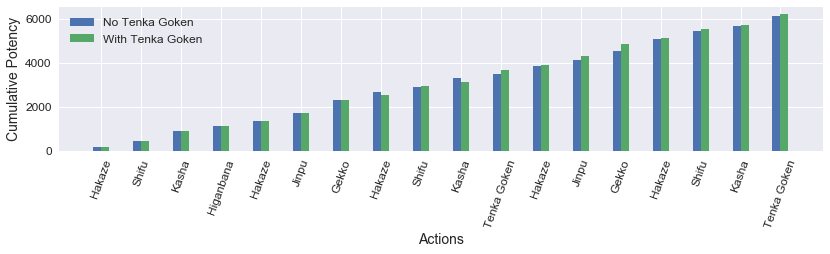

In [163]:
compare_potencies([df5_no_tenka, df5_tenka], ['No Tenka Goken', 'With Tenka Goken'])

### It's surprisingly close! The rotation with Tenka Goken pulls ahead due to where the encounter ended. We can examine the average potency per GCD of a full cycle of each rotation:

### With Tenka Goken: $3641/11 = 331$ potency/GCD

### With Higanbana only: $2647/8 = 330$ potency/GCD

### Again, extremely close. I would favor using Tenka Goken since it's fresh though.

### With the addition of a second third-level combo finisher plus Tenka Goken, do we want to move away from the AoE weaponskill rotation in favor of a single target one for the standard three mob pull?

In [164]:
sam = Samurai()

n_targets = 3

actions = [('Hakaze', sam.hakaze()),
           ('Shifu', sam.shifu()),
           ('Kasha', sam.kasha()),
           ('Higanbana', sam.higanbana()),
           ('Hakaze', sam.hakaze()+sam.higanbana_dot()),
           ('Jinpu', sam.jinpu()+sam.higanbana_dot()),
           ('Gekko', sam.gekko()+sam.higanbana_dot()),
           ('Higanbana', sam.higanbana()+sam.higanbana_dot()),
           ('Hakaze', sam.hakaze()+2*sam.higanbana_dot()),
           ('Shifu', sam.jinpu()+2*sam.higanbana_dot()),
           ('Kasha', sam.kasha()+2*sam.higanbana_dot()),
           ('Hakaze', sam.hakaze()+2*sam.higanbana_dot()),
           ('Jinpu', sam.jinpu()+2*sam.higanbana_dot()),
           ('Gekko', sam.gekko()+2*sam.higanbana_dot()),
           ('Tenka Goken', sam.tenka_goken(n_targets)+2*sam.higanbana_dot())]

In [165]:
df5_aoe_higanbana = pd.DataFrame(actions, columns=['action', 'potency'])
df5_aoe_higanbana['total potency'] = df5_aoe_higanbana['potency'].cumsum(axis=0)
display(df5_aoe_higanbana)

,action,potency,total potency
0,Hakaze,150.000000,150.000000
1,Shifu,280.000000,430.000000
2,Kasha,444.000000,874.000000
3,Higanbana,266.400000,1140.400000
4,Hakaze,214.227273,1354.627273
5,Jinpu,365.686364,1720.313636
6,Gekko,565.486364,2285.800000
7,Higanbana,361.246364,2647.046364
8,Hakaze,301.247727,2948.294091
9,Shifu,467.192727,3415.486818


In [166]:
sam = Samurai()

n_targets = 3

actions = [('Hakaze', sam.hakaze()),
           ('Shifu', sam.shifu()),
           ('Kasha', sam.kasha()),
           ('Hakaze', sam.hakaze()),
           ('Jinpu', sam.jinpu()),
           ('Gekko', sam.gekko()),
           ('Tenka Goken', sam.tenka_goken(n_targets)),
           ('Hakaze', sam.hakaze()),
           ('Shifu', sam.shifu()),
           ('Kasha', sam.kasha()),
           ('Hakaze', sam.hakaze()),
           ('Jinpu', sam.jinpu()),
           ('Gekko', sam.gekko()),
           ('Tenka Goken', sam.tenka_goken(n_targets)),
           ('Hakaze', sam.hakaze())]

In [167]:
df5_aoe_tenka_only = pd.DataFrame(actions, columns=['action', 'potency'])
df5_aoe_tenka_only['total potency'] = df5_aoe_tenka_only['potency'].cumsum(axis=0)
display(df5_aoe_tenka_only)

,action,potency,total potency
0,Hakaze,150.000,150.000
1,Shifu,280.000,430.000
2,Kasha,444.000,874.000
3,Hakaze,166.500,1040.500
4,Jinpu,310.800,1351.300
5,Gekko,510.600,1861.900
6,Tenka Goken,1240.758,3102.658
7,Hakaze,191.475,3294.133
8,Shifu,357.420,3651.553
9,Kasha,510.600,4162.153


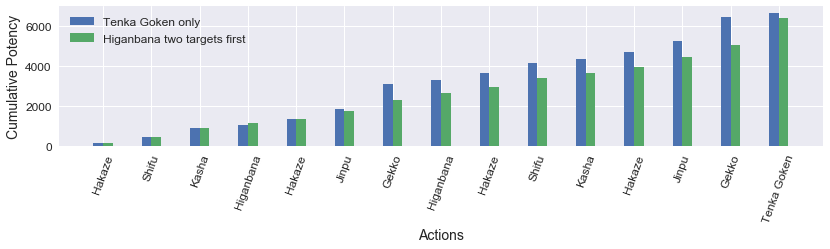

In [168]:
compare_potencies([df5_aoe_tenka_only, df5_aoe_higanbana], ['Tenka Goken only', 'Higanbana two targets first'])

### Both of these rotation potencies are inferior compared to using the AoE skills, even without Tenka Goken. However, we can open Getsu using the Mangetsu combo and open Ka using the Kasha combo. Maybe that works better?

In [169]:
sam = Samurai()

n_targets = 3

actions = [('Hakaze', sam.hakaze()),
           ('Shifu', sam.shifu()),
           ('Kasha', sam.kasha()),
           ('Higanbana', sam.higanbana()),
           ('Fuga', sam.fuga(n_targets)+sam.higanbana_dot()),
           ('Mangetsu', sam.mangetsu(n_targets)+sam.higanbana_dot()),
           ('Higanbana', sam.higanbana()+sam.higanbana_dot()),
           ('Hakaze', sam.hakaze()+2*sam.higanbana_dot()),
           ('Shifu', sam.jinpu()+2*sam.higanbana_dot()),
           ('Kasha', sam.kasha()+2*sam.higanbana_dot()),
           ('Fuga', sam.fuga(n_targets)+2*sam.higanbana_dot()),
           ('Mangetsu', sam.mangetsu(n_targets)+2*sam.higanbana_dot()),
           ('Tenka Goken', sam.tenka_goken(n_targets)+2*sam.higanbana_dot()),
           ('Fuga', sam.fuga(n_targets)+2*sam.higanbana_dot()),
           ('Mangetsu', sam.mangetsu(n_targets)+2*sam.higanbana_dot()),
           ('Hakaze', sam.hakaze()+2*sam.higanbana_dot()),
           ('Shifu', sam.jinpu()+2*sam.higanbana_dot()),
           ('Kasha', sam.kasha()+2*sam.higanbana_dot()),
           ('Tenka Goken', sam.tenka_goken(n_targets)+2*sam.higanbana_dot())]

In [170]:
df5_aoe_higanbana2 = pd.DataFrame(actions, columns=['action', 'potency'])
df5_aoe_higanbana2['total potency'] = df5_aoe_higanbana2['potency'].cumsum(axis=0)
display(df5_aoe_higanbana2)

,action,potency,total potency
0,Hakaze,150.000000,150.000000
1,Shifu,280.000000,430.000000
2,Kasha,444.000000,874.000000
3,Higanbana,266.400000,1140.400000
4,Fuga,380.727273,1521.127273
5,Mangetsu,647.127273,2168.254545
6,Higanbana,314.127273,2482.381818
7,Hakaze,261.954545,2744.336364
8,Shifu,420.572727,3164.909091
9,Kasha,237.422727,3402.331818


In [171]:
sam = Samurai()

n_targets = 3

actions = [('Hakaze', sam.hakaze()),
           ('Shifu', sam.shifu()),
           ('Kasha', sam.kasha()),
           ('Fuga', sam.fuga(n_targets)),
           ('Mangetsu', sam.mangetsu(n_targets)),
           ('Tenka Goken', sam.tenka_goken(n_targets)),
           ('Hakaze', sam.hakaze()),
           ('Shifu', sam.shifu()),
           ('Kasha', sam.kasha()),
           ('Fuga', sam.fuga(n_targets)),
           ('Mangetsu', sam.mangetsu(n_targets)),
           ('Tenka Goken', sam.tenka_goken(n_targets)),
           ('Hakaze', sam.hakaze()),
           ('Shifu', sam.shifu()),
           ('Kasha', sam.kasha()),
           ('Fuga', sam.fuga(n_targets)),
           ('Mangetsu', sam.mangetsu(n_targets)),
           ('Tenka Goken', sam.tenka_goken(n_targets))]

In [172]:
df5_aoe_tenka_only2 = pd.DataFrame(actions, columns=['action', 'potency'])
df5_aoe_tenka_only2['total potency'] = df5_aoe_tenka_only2['potency'].cumsum(axis=0)
display(df5_aoe_tenka_only2)

,action,potency,total potency
0,Hakaze,150.00,150.00
1,Shifu,280.00,430.00
2,Kasha,444.00,874.00
3,Fuga,333.00,1207.00
4,Mangetsu,599.40,1806.40
5,Tenka Goken,1078.92,2885.32
6,Hakaze,166.50,3051.82
7,Shifu,310.80,3362.62
8,Kasha,444.00,3806.62
9,Fuga,333.00,4139.62


### In terms of average potency per GCD, applying Higanbana to two targets before using Tenka Goken and using the Mangetsu combo to open Getsu wins out at 538. Using Tenka Goken exclusively but also using the Mangetsu combo to open Getsu follows at 486, while the previous rotation with Higanbana and Mangetsu combo only comes in at 469. Although the inclusion of the AoE weaponskills will scale better with larger pulls, we must remember TP sustainability is a concern. As the number of targets dwindles down to 3, it may be better to favor rotations with single target weaponskills.

### Thankfully, level 45 introduces the Oka AoE combo (combo from Fuga). This finisher is equal in potency to the Mangetsu finisher, but similarly to Kasha for single target, opens the Ka Sen instead. This opens the AoE rotation of alternating combos to open Ka and Getsu in order to use Tenka Goken. While this is definitely TP unfriendly, it should scale very well with mob size.

In [173]:
dfs = []
labels = []

for n_targets in range(2, 8):
    sam = Samurai()
    
    actions = [('Fuga', sam.fuga(n_targets)),
               ('Mangetsu', sam.mangetsu(n_targets)),
               ('Fuga', sam.fuga(n_targets)),
               ('Oka', sam.oka(n_targets)),
               ('Tenka Goken', sam.tenka_goken(n_targets)),
               ('Fuga', sam.fuga(n_targets)),
               ('Mangetsu', sam.mangetsu(n_targets)),
               ('Fuga', sam.fuga(n_targets)),
               ('Oka', sam.oka(n_targets)),
               ('Tenka Goken', sam.tenka_goken(n_targets)),
               ('Fuga', sam.fuga(n_targets)),
               ('Mangetsu', sam.mangetsu(n_targets)),
               ('Fuga', sam.fuga(n_targets)),
               ('Oka', sam.oka(n_targets)),
               ('Tenka Goken', sam.tenka_goken(n_targets))]
    
    df_temp = pd.DataFrame(actions, columns=['action', 'potency'])
    df_temp['total potency'] = df_temp['potency'].cumsum(axis=0)
    dfs.append(df_temp)
    
    labels.append('%s targets' % n_targets)  

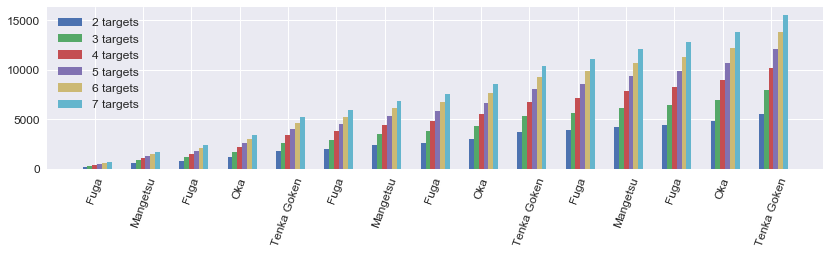

In [174]:
compare_n_potencies(dfs, labels)

### At 3 targets, the potency of a full duration Higanbana is comparable to Tenka Goken, so applying Higanbana to some targets has merit (especially due to its 1 Sen cost). However, the AoE-centric rotation scales exceptionally well as pull size passes 3. The ability to open up Getsu and Ka with only four GCDs allowing for more frequent Tenka Goken casts facilitates that.

### Priority: Shifu > Jinpu and Higanbana > Tenka Goken

### Filler: Alternate Kasha and Gekko combos to maintain buffs and enable Tenka Goken

### AoE: Mangetsu combo, Oka combo if available, otherwise Kasha combo. For packs of 3, apply Higanbana to 1-2 sturdy targets before building for Tenka Goken. For larger packs, use Tenka Goken only. Shift to single target weaponskills if TP is scarce but prioritize Iaijutsu as described.

## lvl 50-70 rotation

### With all weaponskills acquired at level 50, the remainder of the levels up to 70 fill out the Hissatsu mechanic. These abilities are spenders for the Kenki gauge and add personal utility, buffs, or extra damage. I'm assuming a lvl 50 trait adds the Kenki accumulation. (Kenki mastery I). Kenki mastery II is a lvl 62 trait that increases the Kenki gauage when executing all weaponskills excluding Iaijutsu. Prior to that is it from autoattacks? TBD.

### lvl 52: Hissatsu: Kaiten increases next weaponskill damage by 50%. Five second recast. Use on Higanbana > Midare Setsugekka > Tenka Goken, depending on situation.

### lvl 54: Hissatsu: Gyoten is a gap closer with potency.

### lvl 56: Hissatsu: Yaten is a disengage backflip. It grants Enhanced Enbi which lets you use a high potency, ranged followup to maintain uptime.

### lvl 58: Merciful Eyes is a self heal that may be used after using Third Eye. Share recast with Starry Eyes.

### lvl 60: Meditate is an ability that increases your Kenki gauge during extended periods of downtime.

### lvl 62: Hissatsu: Shinten is a high potency filler ability with short recast. It should be used to dump Kenki when it is not needed for Hissatsu: Kaiten. This is likely after Hissatsu: Kaiten has already been applied to Higanbana and Midare Setsugekka and you are building up for another Midare Setsugekka.

### lvl 64: Hissatsu: Kyuten is analogous to Hissatsu: Shinten but for PBAoE. However, since Tenka Goken only requires two Sen, maybe you don't need to dump Kenki unless you need the burst?

### lvl 66: Starry Eyes is ability filler usable after Third Eye. It costs the same amount of Kenki as Hissatsu: Shinten while being 2/3 of the potency so... idk?

### lvl 68: Hagakure is a 40s cooldown ability that converts open Sen to Kenki at a rate of 1:20. This will be interesting to look at.

### lvl 70: Hissatsu: Guren is a line AoE that deals massive damage -- 800 potency for the first hit, 600 for the next hit, and 400 for any remaining. Literally the strongest action in the game other than Kaiten buffed Iaijutsu. Will have to look at Kenki generation to see its use, especially in single target situations.